# Building a Quantum Calculator

Important first step: sign-up for IBM Quantum Experience

https://quantum-computing.ibm.com/

In [6]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator

def test(qc):
    quantum_obj = qiskit.assemble(qc)
    # running the quantum circuit on a classical simulator
    sim = qiskit.Aer.get_backend('aer_simulator')
    result = sim.run(quantum_obj).result()
    counts = result.get_counts()
    # printing the results
    print(counts)
    
    # visualize the results
    return qiskit.visualization.plot_histogram(counts)

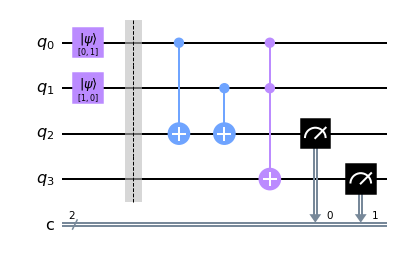

In [12]:
qc = QuantumCircuit(4, 2) # this is a quantum circuit with 4 qbits and 2 classical bits

initial_state_0 = [0, 1] # this is the |0> state
initial_state_1 = [1, 0] # this is the |1> state

# expected behavior of the quantum calculator..
# we expect that |1> + |0> = 01
# we expect that |0> + |1> = 01
# we expect that |0> + |0> = 00
# we expect that |1> + |1> = 10

# let's initialize the qbits
qc.initialize(initial_state_0, 0)
qc.initialize(initial_state_1, 1)
qc.save_statevector()

# add the quantum gates now
qc.cx(0, 2) # add a CNOT (XOR) gate controlled by q0, targeting q2
qc.cx(1, 2) # add a CNOT (XOR) gate controlled by q1, targeting q2
qc.ccx(0, 1, 3) # add a Toffoli (AND) gate controlled by q0 and q1, targeting q3

# measure our qbits
qc.measure(2, 0) # measure q2 on classical bit 0
qc.measure(3, 1) # measure q3 on classical bit 1
qc.draw()

{'01': 1024}


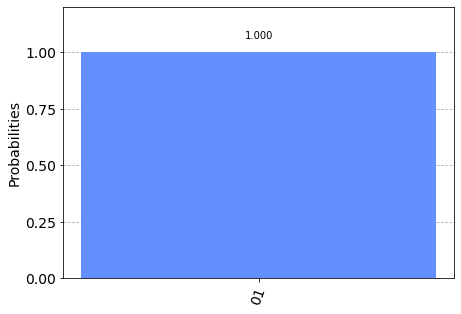

In [13]:
test(qc)

simulators are nice... but how would this result change if we used an actual quantum computer? 😎

https://quantum-computing.ibm.com/composer/files/new?initial=N4IgdghgtgpiBcICCATFMBOACAwgSwwGMBXPAFxABoQBHCAZygRAHkAFAUQDkBFJAZQCyWAEwA6AAwBuADpg8YQgBti6LDNowleAEYBGMQsIbZYOTQwwA5lhoBtACwBdU4Us3CdkS7kAPW3YSPmD%2B9nrBhKGBTpQB3q5R4bH28XKEkQFByXZJAQDMwbAMxJZxTlgAtAB8WJ5BpkX0JTD55dW1OS5UIOj0bngADmR4APZgzCAAvkA